In [214]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/csc-578-final-project-fall-2023/lsst-train.csv
/kaggle/input/csc-578-final-project-fall-2023/lsst-test.csv


# CSC 578 FINAL PROJECT (FALL 2023)
# Name: VIJAYALAKSHMI RAMESH
# Course: CSC 578 Neural Networks and Deep learning
# Section no: 710

### **Tried several models but included only the models that I have submitted and that moved me up in the leaderboard in this code file and report.** 

### **Model 1:** Bidirectional LSTM layer with 32 memory cells *[Best Model]*

### **Model 2:** LSTM Layer with 8 memory cells *[Initial Model]*

### **Model 3:** Stack RNN - LSTM Layers with 32 memory cells and 16 memory cells

### **Model 4:** GRU layer with 64 memory cells

### **Model 5:** Stack RNN - GRU Layers with 64, 32 and 16 memory cells

### **Model 6:** Combination of SimpleRNN, LSTM and GRU layer

### **Model 7:** Stack RNN - Bidirectional LSTM layers with 64 and 32 memory cells

### **Model 8:** Batch Normalization with various layers [LSTM with 16 memory cells; GRU layers with 8 and 32 memory cells; Simple RNN with 64 memory cells]

## **Further / Advance Development:**

### **Model 9:** Downsampling the majority class

### **Model 10:** Min-Max Normalization technique

## Importing necessary libraries 

In [215]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# **Best Model -- [Model 1]**

# Bidirectional LSTM layer with 32 memory cells

## Preparing training data

In [216]:
#Reading training data as pandas dataframe
lsst_train = pd.read_csv('/kaggle/input/csc-578-final-project-fall-2023/lsst-train.csv')
lsst_train.head()

,f-1-1,f-1-2,f-1-3,f-1-4,f-1-5,f-1-6,f-1-7,f-1-8,f-1-9,f-1-10,...,f-6-28,f-6-29,f-6-30,f-6-31,f-6-32,f-6-33,f-6-34,f-6-35,f-6-36,target
0,2.57770,-1.18830,-4.98950,-6.4301,-4.6503,-1.02450,1.90420,2.48850,1.360500,0.90286,...,22.36600,-24.7480,-34.21500,7.7464,-5.8332,-0.71757,8.16160,-29.6940,-27.5700,c-90
1,6.67580,22.54300,44.02700,66.9610,86.0820,96.80400,96.76000,86.49400,69.094000,48.97100,...,19.26700,28.5110,0.97578,-28.0270,-18.0720,-4.00020,-43.07500,-4.7283,-43.0070,c-15
2,0.37554,-3.10860,-0.26009,3.2281,-1.9951,0.12797,0.25844,-0.25394,-0.091828,2.41440,...,-4.02610,14.5270,50.00500,-13.8860,3.3589,5.00450,-0.47256,-2.7713,1.9379,c-42
3,0.51852,0.12078,1.53240,5.5783,11.5340,17.01300,18.97100,15.38700,6.685500,-4.07800,...,23.24700,31.9850,26.62100,-12.2560,3.4805,23.80500,-32.36400,-15.1610,-14.4500,c-16
4,1.47150,1.44510,2.91330,1.0015,-1.2503,1.55160,1.73170,0.47796,0.539860,-1.71690,...,-0.18477,3.8533,-5.80000,1.4909,2.7581,-3.16650,-0.30058,6.6334,7.3427,c-67


## Converting target column to integers

In [217]:
# Converting target column to integers
from sklearn.preprocessing import LabelEncoder

target_column = ['c-15', 'c-16', 'c-42', 'c-52', 'c-62', 'c-65', 'c-67', 'c-88', 'c-90', 'c-92', 'c-95']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column
integer_encoded = label_encoder.fit_transform(lsst_train['target'])

# Print the mapping between original classes and encoded integers
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:", class_mapping)

lsst_train['target'] = integer_encoded

lsst_train.head()

Class Mapping: {'c-15': 0, 'c-16': 1, 'c-42': 2, 'c-52': 3, 'c-62': 4, 'c-65': 5, 'c-67': 6, 'c-88': 7, 'c-90': 8, 'c-92': 9, 'c-95': 10}


,f-1-1,f-1-2,f-1-3,f-1-4,f-1-5,f-1-6,f-1-7,f-1-8,f-1-9,f-1-10,...,f-6-28,f-6-29,f-6-30,f-6-31,f-6-32,f-6-33,f-6-34,f-6-35,f-6-36,target
0,2.57770,-1.18830,-4.98950,-6.4301,-4.6503,-1.02450,1.90420,2.48850,1.360500,0.90286,...,22.36600,-24.7480,-34.21500,7.7464,-5.8332,-0.71757,8.16160,-29.6940,-27.5700,8
1,6.67580,22.54300,44.02700,66.9610,86.0820,96.80400,96.76000,86.49400,69.094000,48.97100,...,19.26700,28.5110,0.97578,-28.0270,-18.0720,-4.00020,-43.07500,-4.7283,-43.0070,0
2,0.37554,-3.10860,-0.26009,3.2281,-1.9951,0.12797,0.25844,-0.25394,-0.091828,2.41440,...,-4.02610,14.5270,50.00500,-13.8860,3.3589,5.00450,-0.47256,-2.7713,1.9379,2
3,0.51852,0.12078,1.53240,5.5783,11.5340,17.01300,18.97100,15.38700,6.685500,-4.07800,...,23.24700,31.9850,26.62100,-12.2560,3.4805,23.80500,-32.36400,-15.1610,-14.4500,1
4,1.47150,1.44510,2.91330,1.0015,-1.2503,1.55160,1.73170,0.47796,0.539860,-1.71690,...,-0.18477,3.8533,-5.80000,1.4909,2.7581,-3.16650,-0.30058,6.6334,7.3427,6


In [218]:
lsst_train.shape

(3356, 217)

## Reshaping the training data

In [219]:
# Reshaping X_train to (-1, timesteps, features)
timesteps = 6
features = 36

X_train = lsst_train.iloc[:, :-1]
X_train = X_train.to_numpy()
X_train_reshaped = X_train.reshape(-1, timesteps, features)

# Display the shape of the original and reshaped arrays
print("Original shape:", X_train.shape)
print("Reshaped shape:", X_train_reshaped.shape)

X_train = X_train_reshaped

Original shape: (3356, 216)
Reshaped shape: (3356, 6, 36)


In [220]:
# Reshaping Y_train to (-1,1)

Y_train = lsst_train['target']
Y_train = Y_train.to_numpy()
Y_train_reshaped = Y_train.reshape(-1, 1)

# Display the shape of the original and reshaped arrays
print("Original shape:", Y_train.shape)
print("Reshaped shape:", Y_train_reshaped.shape)

Y_train = Y_train_reshaped

Original shape: (3356,)
Reshaped shape: (3356, 1)


## Adding normalization layer

In [221]:
# Creating normalization layer according to code snippet in html file

normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train) 

## Building the model

In [222]:
#Building the model (Bidirectional LSTM)

# Defining input layer
input_shape = X_train.shape[1:]
inputs = tf.keras.Input(shape=input_shape)

# Normalization layer receives the input
x = normalizer(inputs)

# Bidirectional LSTM layer
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, recurrent_dropout=0.3, return_sequences=False))(x)
x = tf.keras.layers.Dropout(0.5)(x)

# Adding output layer
outputs = tf.keras.layers.Dense(11, activation='softmax')(x)

# Finally, define the model by specifying the input and output layers
bidirectional_lstm_model = keras.Model(inputs, outputs)

## Compiling the model

In [223]:
# Compile the model

bidirectional_lstm_model.compile(optimizer=Adam(learning_rate = 0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
bidirectional_lstm_model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 6, 36)]           0         
                                                                 
 normalization_4 (Normaliza  (None, 6, 36)             73        
 tion)                                                           
                                                                 
 bidirectional_8 (Bidirecti  (None, 64)                17664     
 onal)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 11)                715       
                                                                 
Total params: 18452 (72.08 KB)
Trainable params: 18379 (71

## Training the model

In [224]:
# Train the model

history = bidirectional_lstm_model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
84/84 [==============================] - 8s 21ms/step - loss: 1.9494 - accuracy: 0.3580 - val_loss: 1.7375 - val_accuracy: 0.4167
Epoch 2/30
84/84 [==============================] - 1s 13ms/step - loss: 1.7121 - accuracy: 0.4117 - val_loss: 1.6422 - val_accuracy: 0.4449
Epoch 3/30
84/84 [==============================] - 1s 13ms/step - loss: 1.6397 - accuracy: 0.4322 - val_loss: 1.5388 - val_accuracy: 0.4598
Epoch 4/30
84/84 [==============================] - 1s 14ms/step - loss: 1.5753 - accuracy: 0.4452 - val_loss: 1.6029 - val_accuracy: 0.4702
Epoch 5/30
84/84 [==============================] - 1s 14ms/step - loss: 1.5219 - accuracy: 0.4717 - val_loss: 1.4592 - val_accuracy: 0.5253
Epoch 6/30
84/84 [==============================] - 1s 14ms/step - loss: 1.4683 - accuracy: 0.4948 - val_loss: 1.4303 - val_accuracy: 0.5045
Epoch 7/30
84/84 [==============================] - 1s 14ms/step - loss: 1.4299 - accuracy: 0.5011 - val_loss: 1.3785 - val_accuracy: 0.5298
Epoch 8/30
84

## Plotting the result

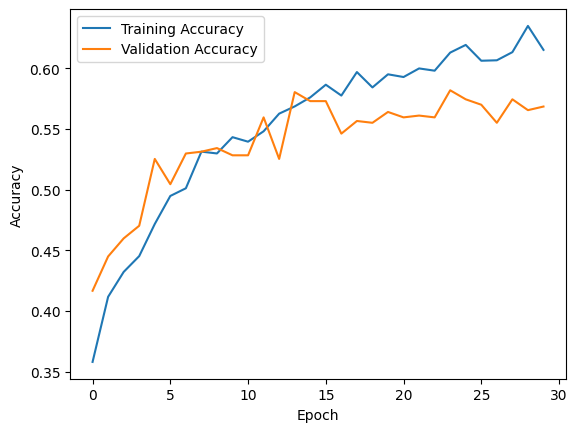

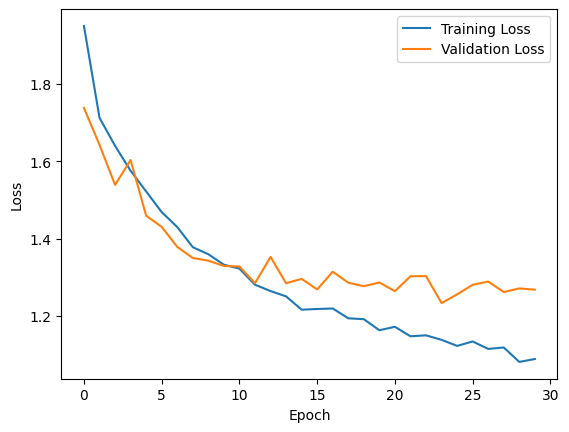

In [225]:
# Plotting the result
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Preparing the test data

In [226]:
# Reading test data into pandas dataframe
lsst_test = pd.read_csv('/kaggle/input/csc-578-final-project-fall-2023/lsst-test.csv')
lsst_test.head()

,f-1-1,f-1-2,f-1-3,f-1-4,f-1-5,f-1-6,f-1-7,f-1-8,f-1-9,f-1-10,...,f-6-27,f-6-28,f-6-29,f-6-30,f-6-31,f-6-32,f-6-33,f-6-34,f-6-35,f-6-36
0,25.575000,25.5650,6.8052,-26.012,-55.1290,-62.0750,-43.3400,-14.26500,4.03600,2.8128,...,114.9600,116.3700,69.0540,11.8250,29.5960,55.14500,1.0701,-31.4420,20.914,39.9590
1,2.432400,10.4920,16.6900,14.609,3.8112,-8.9224,-15.1370,-11.82400,-3.60240,2.0792,...,16.7950,3.3646,5.7902,52.7540,-19.5210,-9.35210,63.4920,-17.8800,-40.938,6.2865
2,-0.166710,-1.0756,-0.8531,1.626,-1.8959,2.4717,-0.2629,-1.43750,0.89766,-2.4570,...,-3.3971,-8.2973,8.8071,-3.6586,-6.4716,0.87079,2.6530,2.2138,-1.323,-2.1806
3,-4.800300,-3.5558,-5.2497,-10.011,-10.9800,-3.5785,4.9622,2.28200,-11.07200,-17.1180,...,2.9662,-6.1161,-34.6170,-96.5080,-94.9050,-8.84960,48.7190,-15.2810,-15.786,34.8360
4,-0.048579,-11.9320,-25.6890,-35.259,-36.0600,-27.6460,-13.9240,-0.79703,7.31190,9.8219,...,63.1690,64.7760,53.0120,-83.1160,-50.6480,79.74300,-16.5700,74.2040,72.036,100.2200


## Reshaping the test data

In [227]:
# Reshaping X_test to (-1, timesteps, features)
timesteps = 6
features = 36

X_test = lsst_test.to_numpy()
X_test_reshaped = X_test.reshape(-1, timesteps, features)

# Display the shape of the original and reshaped arrays
print("Original shape:", X_test.shape)
print("Reshaped shape:", X_test_reshaped.shape)

X_test = X_test_reshaped

Original shape: (1439, 216)
Reshaped shape: (1439, 6, 36)


## Prediction on test data

In [228]:
# Make predictions on the test data
predictions = bidirectional_lstm_model.predict(X_test)

45/45 [==============================] - 1s 4ms/step


## Writing the output file

In [229]:
#Create a DataFrame for the submission format
submission_columns = ['ID', 'c-15', 'c-16', 'c-42', 'c-52', 'c-62', 'c-65', 'c-67', 'c-88', 'c-90', 'c-92', 'c-95']
submission_df = pd.DataFrame(columns=submission_columns)

# Add ID column to the submission DataFrame
submission_df['ID'] = range(len(predictions))

# Add predicted values to the submission DataFrame
submission_df[['c-15', 'c-16', 'c-42', 'c-52', 'c-62', 'c-65', 'c-67', 'c-88', 'c-90', 'c-92', 'c-95']] = predictions

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

-------

# **Initial Model -- [Model 2]**

# LSTM Layer with 8 memory cells

## Adding normalization layer

In [230]:
# Creating normalization layer 

normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train) 

## Building the model

In [231]:
# Building the model

# Defining input layer
input_shape = X_train.shape[1:]
inputs = tf.keras.Input(shape = input_shape)

# Normalization layer receives the input
x = normalizer(inputs)

# Adding LSTM layer in the model
x = tf.keras.layers.LSTM(8)(x)

# Adding output layer
outputs = tf.keras.layers.Dense(11, activation = 'softmax')(x)

# Finally define the model by specifying the input and output layers
lstm_model = keras.Model(inputs, outputs)

## Compiling the model

In [232]:
# Compile the model

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 6, 36)]           0         
                                                                 
 normalization_5 (Normaliza  (None, 6, 36)             73        
 tion)                                                           
                                                                 
 lstm_13 (LSTM)              (None, 8)                 1440      
                                                                 
 dense_11 (Dense)            (None, 11)                99        
                                                                 
Total params: 1612 (6.30 KB)
Trainable params: 1539 (6.01 KB)
Non-trainable params: 73 (296.00 Byte)
_________________________________________________________________


## Training the model

In [233]:
# Train the model

history = lstm_model.fit(X_train, Y_train, epochs=25, batch_size=32, validation_split=0.2)

Epoch 1/25
84/84 [==============================] - 6s 16ms/step - loss: 2.3518 - accuracy: 0.2955 - val_loss: 2.2820 - val_accuracy: 0.3304
Epoch 2/25
84/84 [==============================] - 1s 8ms/step - loss: 2.1818 - accuracy: 0.3286 - val_loss: 2.0574 - val_accuracy: 0.3289
Epoch 3/25
84/84 [==============================] - 1s 9ms/step - loss: 2.0349 - accuracy: 0.3282 - val_loss: 1.9880 - val_accuracy: 0.3333
Epoch 4/25
84/84 [==============================] - 1s 8ms/step - loss: 1.9833 - accuracy: 0.3338 - val_loss: 1.9558 - val_accuracy: 0.3363
Epoch 5/25
84/84 [==============================] - 1s 8ms/step - loss: 1.9537 - accuracy: 0.3361 - val_loss: 1.9276 - val_accuracy: 0.3438
Epoch 6/25
84/84 [==============================] - 1s 8ms/step - loss: 1.9262 - accuracy: 0.3428 - val_loss: 1.9019 - val_accuracy: 0.3557
Epoch 7/25
84/84 [==============================] - 1s 8ms/step - loss: 1.8966 - accuracy: 0.3569 - val_loss: 1.8722 - val_accuracy: 0.3735
Epoch 8/25
84/84 [=

## Plotting the result

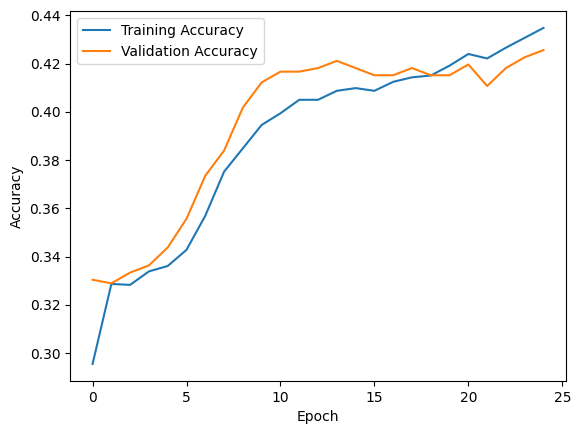

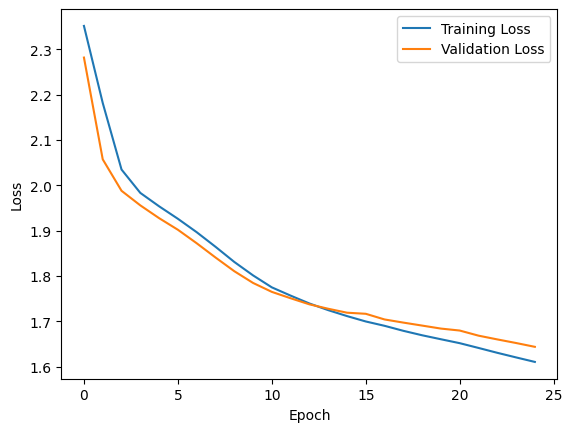

In [234]:
# Plotting the result
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

-----

# **Stack RNN -- [Model 3]**

# LSTM Layers with 32 memory cells and 16 memory cells

## Adding normalization layer

In [235]:
# Creating normalization layer 

normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train) 

## Building the model

In [236]:
# Building the model

# Defining input layer
input_shape = X_train.shape[1:]
inputs = tf.keras.Input(shape = input_shape)

# Normalization layer receives the input
x = normalizer(inputs)

# Adding the first LSTM layer in the model
x = tf.keras.layers.LSTM(32, return_sequences=True, recurrent_dropout = 0.2)(x)  #16 memory cellls or hidden units 
x = tf.keras.layers.Dropout(0.2)(x)

# Adding the second LSTM layer
x = tf.keras.layers.LSTM(16, recurrent_dropout = 0.2)(x)
, recurrent_dropout = 0.2

# Adding output layer
outputs = tf.keras.layers.Dense(11, activation = 'softmax')(x)

# Finally define the model by specifying the input and output layers
lstm_model = keras.Model(inputs, outputs)

In [237]:
# Compile the model

lstm_model.compile(optimizer=Adam(learning_rate = 0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 6, 36)]           0         
                                                                 
 normalization_6 (Normaliza  (None, 6, 36)             73        
 tion)                                                           
                                                                 
 lstm_14 (LSTM)              (None, 6, 32)             8832      
                                                                 
 dropout_8 (Dropout)         (None, 6, 32)             0         
                                                                 
 lstm_15 (LSTM)              (None, 16)                3136      
                                                                 
 dense_12 (Dense)            (None, 11)                187       
                                                          

## Training the model

In [238]:
# Train the model

history = lstm_model.fit(X_train, Y_train, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10
168/168 [==============================] - 9s 20ms/step - loss: 1.8789 - accuracy: 0.3800 - val_loss: 1.7547 - val_accuracy: 0.4018
Epoch 2/10
168/168 [==============================] - 3s 17ms/step - loss: 1.6915 - accuracy: 0.4102 - val_loss: 1.6752 - val_accuracy: 0.4315
Epoch 3/10
168/168 [==============================] - 3s 17ms/step - loss: 1.5918 - accuracy: 0.4445 - val_loss: 1.5480 - val_accuracy: 0.4494
Epoch 4/10
168/168 [==============================] - 3s 18ms/step - loss: 1.5259 - accuracy: 0.4683 - val_loss: 1.5264 - val_accuracy: 0.4613
Epoch 5/10
168/168 [==============================] - 3s 18ms/step - loss: 1.4311 - accuracy: 0.5007 - val_loss: 1.4175 - val_accuracy: 0.5074
Epoch 6/10
168/168 [==============================] - 3s 17ms/step - loss: 1.3857 - accuracy: 0.5160 - val_loss: 1.4339 - val_accuracy: 0.4658
Epoch 7/10
168/168 [==============================] - 3s 18ms/step - loss: 1.3350 - accuracy: 0.5387 - val_loss: 1.3391 - val_accuracy: 0.5506

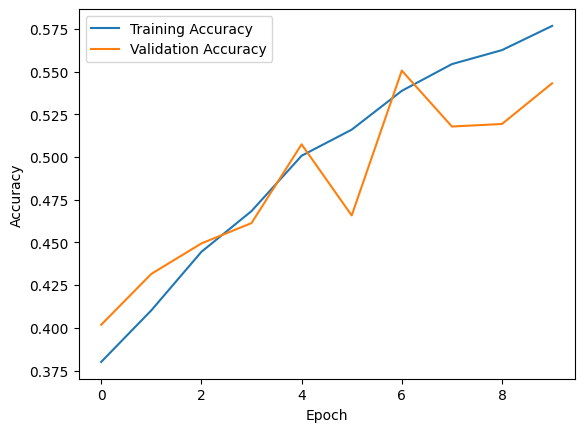

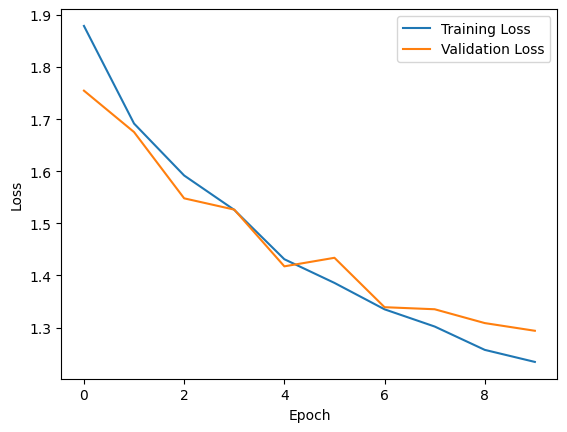

In [239]:
# Plotting the result
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

------

# **GRU(Gated Recurrent Unit) Layer -- [Model 4]**

# GRU layer with 64 memory cells

## Building the model

In [240]:
# Creating normalization layer e

normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train) 

In [241]:
# Building the model

# Defining input layer
input_shape = X_train.shape[1:]
inputs = tf.keras.Input(shape = input_shape)

# Normalization layer receives the input
x = normalizer(inputs)

# Adding the GRU layer in the model
x = tf.keras.layers.GRU(64, recurrent_dropout = 0.2, return_sequences = False)(x)  #64 memory cellls or hidden units 
x = tf.keras.layers.Dropout(0.3)(x)

# Adding output layer
outputs = tf.keras.layers.Dense(11, activation = 'softmax')(x)

# Finally define the model by specifying the input and output layers
gru_model = keras.Model(inputs, outputs)

In [242]:
# Compile the model

gru_model.compile(optimizer=Adam(learning_rate = 0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
gru_model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 6, 36)]           0         
                                                                 
 normalization_7 (Normaliza  (None, 6, 36)             73        
 tion)                                                           
                                                                 
 gru_2 (GRU)                 (None, 64)                19584     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 11)                715       
                                                                 
Total params: 20372 (79.58 KB)
Trainable params: 20299 (79.29 KB)
Non-trainable params: 73 (296.00 Byte)
___________________

## Training the model

In [243]:
# Train the model

history = gru_model.fit(X_train, Y_train, epochs=15, batch_size=16, validation_split=0.2)

Epoch 1/15
168/168 [==============================] - 5s 13ms/step - loss: 1.9029 - accuracy: 0.3767 - val_loss: 1.6491 - val_accuracy: 0.4330
Epoch 2/15
168/168 [==============================] - 2s 10ms/step - loss: 1.6352 - accuracy: 0.4385 - val_loss: 1.5289 - val_accuracy: 0.4777
Epoch 3/15
168/168 [==============================] - 2s 10ms/step - loss: 1.5184 - accuracy: 0.4825 - val_loss: 1.4721 - val_accuracy: 0.5015
Epoch 4/15
168/168 [==============================] - 2s 10ms/step - loss: 1.4568 - accuracy: 0.4996 - val_loss: 1.4128 - val_accuracy: 0.4866
Epoch 5/15
168/168 [==============================] - 2s 10ms/step - loss: 1.3839 - accuracy: 0.5227 - val_loss: 1.3746 - val_accuracy: 0.5283
Epoch 6/15
168/168 [==============================] - 2s 10ms/step - loss: 1.3592 - accuracy: 0.5313 - val_loss: 1.3539 - val_accuracy: 0.5298
Epoch 7/15
168/168 [==============================] - 2s 11ms/step - loss: 1.3103 - accuracy: 0.5488 - val_loss: 1.4039 - val_accuracy: 0.5119

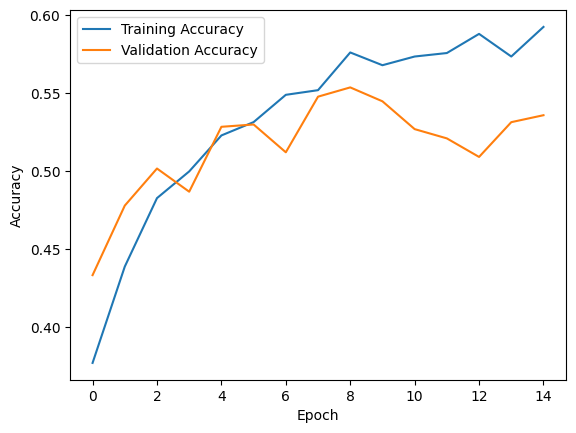

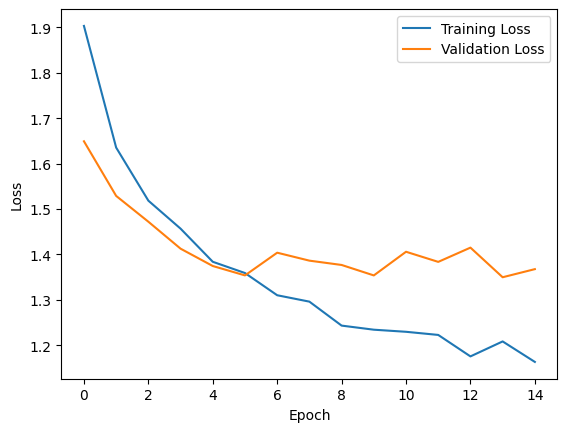

In [244]:
# Plotting the result
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

-----

# **Stack GRU -- [Model 5]**



# GRU Layers with 64, 32 and 16 memory cells

## Building the model

In [245]:
# Creating normalization layer 

normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train) 

In [246]:
#Building the model

# Defining input layer
input_shape = X_train.shape[1:]
inputs = tf.keras.Input(shape=input_shape)

# Normalization layer receives the input
x = normalizer(inputs)

# Adding the first GRU layer in the model with return_sequences and return_state
gru_output, gru_state = tf.keras.layers.GRU(64, recurrent_dropout = 0.2, return_sequences=True, return_state=True)(x)
x = tf.keras.layers.Dropout(0.2)(gru_output)

# Adding the second GRU layer with dropout
x = tf.keras.layers.GRU(32, recurrent_dropout = 0.2, return_sequences=True)(x)  # Use return_sequences=True to get an output sequence
x = tf.keras.layers.Dropout(0.3)(x)

# Adding the third GRU layer
x = tf.keras.layers.GRU(16, recurrent_dropout = 0.2, return_sequences=False)(x)
x = tf.keras.layers.Dropout(0.4)(x)

# Adding output layer
outputs = tf.keras.layers.Dense(11, activation='softmax')(x)

# Finally, define the model by specifying the input and output layers
gru_model = keras.Model(inputs, outputs)

## Compiling the model

In [247]:
# Compile the model

gru_model.compile(optimizer=Adam(learning_rate = 0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
gru_model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 6, 36)]           0         
                                                                 
 normalization_8 (Normaliza  (None, 6, 36)             73        
 tion)                                                           
                                                                 
 gru_3 (GRU)                 [(None, 6, 64),           19584     
                              (None, 64)]                        
                                                                 
 dropout_10 (Dropout)        (None, 6, 64)             0         
                                                                 
 gru_4 (GRU)                 (None, 6, 32)             9408      
                                                                 
 dropout_11 (Dropout)        (None, 6, 32)             0  

## Training the model

In [248]:
# Train the model

history = gru_model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
84/84 [==============================] - 12s 38ms/step - loss: 1.9824 - accuracy: 0.3491 - val_loss: 1.6861 - val_accuracy: 0.4345
Epoch 2/15
84/84 [==============================] - 2s 25ms/step - loss: 1.7277 - accuracy: 0.4128 - val_loss: 1.5350 - val_accuracy: 0.4807
Epoch 3/15
84/84 [==============================] - 2s 24ms/step - loss: 1.6368 - accuracy: 0.4419 - val_loss: 1.5537 - val_accuracy: 0.4539
Epoch 4/15
84/84 [==============================] - 2s 26ms/step - loss: 1.5980 - accuracy: 0.4579 - val_loss: 1.4731 - val_accuracy: 0.4807
Epoch 5/15
84/84 [==============================] - 2s 26ms/step - loss: 1.5609 - accuracy: 0.4650 - val_loss: 1.4537 - val_accuracy: 0.4911
Epoch 6/15
84/84 [==============================] - 2s 25ms/step - loss: 1.5222 - accuracy: 0.4810 - val_loss: 1.4561 - val_accuracy: 0.4821
Epoch 7/15
84/84 [==============================] - 2s 26ms/step - loss: 1.5106 - accuracy: 0.4903 - val_loss: 1.4389 - val_accuracy: 0.4970
Epoch 8/15
8

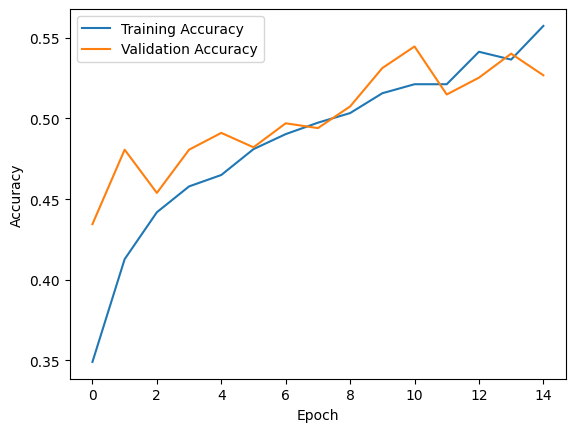

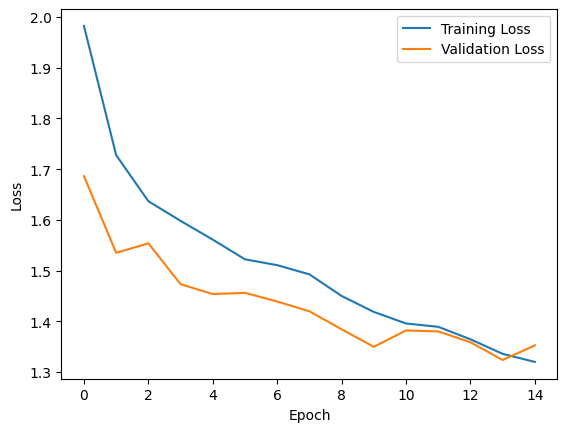

In [249]:
# Plotting the result
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

-----

# **Combination of SimpleRNN, LSTM and GRU layer [Model 6]**

## Building the model

In [250]:
# Creating normalization layer 

normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train) 

In [251]:
#Building the model

# Defining input layer
input_shape = X_train.shape[1:]
inputs = tf.keras.Input(shape=input_shape)

# Normalization layer receives the input
x = normalizer(inputs)

# Adding the SimpleRNN layer in the model with return_sequences
x = tf.keras.layers.SimpleRNN(4, recurrent_dropout = 0.2, return_sequences=True)(x)
x = tf.keras.layers.Dropout(0.2)(x)

# Adding LSTM layer
x = tf.keras.layers.LSTM(8, recurrent_dropout = 0.2, return_sequences=True)(x)

# Adding GRU layer
x = tf.keras.layers.GRU(16, recurrent_dropout = 0.2, return_sequences=False)(x)

# Adding output layer
outputs = tf.keras.layers.Dense(11, activation='softmax')(x)

# Finally, define the model by specifying the input and output layers
rnn_model = keras.Model(inputs, outputs)

## Compiling the model

In [252]:
# Compile the model

rnn_model.compile(optimizer=Adam(learning_rate = 0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 6, 36)]           0         
                                                                 
 normalization_9 (Normaliza  (None, 6, 36)             73        
 tion)                                                           
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 6, 4)              164       
                                                                 
 dropout_13 (Dropout)        (None, 6, 4)              0         
                                                                 
 lstm_16 (LSTM)              (None, 6, 8)              416       
                                                                 
 gru_6 (GRU)                 (None, 16)                1248      
                                                          

## Training the model

In [253]:
# Train the model

history = rnn_model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
84/84 [==============================] - 10s 30ms/step - loss: 1.9511 - accuracy: 0.3495 - val_loss: 1.7358 - val_accuracy: 0.4018
Epoch 2/30
84/84 [==============================] - 2s 20ms/step - loss: 1.7380 - accuracy: 0.3994 - val_loss: 1.6504 - val_accuracy: 0.4286
Epoch 3/30
84/84 [==============================] - 2s 18ms/step - loss: 1.6250 - accuracy: 0.4374 - val_loss: 1.5689 - val_accuracy: 0.4554
Epoch 4/30
84/84 [==============================] - 2s 20ms/step - loss: 1.5970 - accuracy: 0.4463 - val_loss: 1.5035 - val_accuracy: 0.4792
Epoch 5/30
84/84 [==============================] - 2s 19ms/step - loss: 1.5397 - accuracy: 0.4668 - val_loss: 1.4583 - val_accuracy: 0.4658
Epoch 6/30
84/84 [==============================] - 2s 21ms/step - loss: 1.5095 - accuracy: 0.4709 - val_loss: 1.4546 - val_accuracy: 0.4598
Epoch 7/30
84/84 [==============================] - 2s 20ms/step - loss: 1.4891 - accuracy: 0.4776 - val_loss: 1.4297 - val_accuracy: 0.4866
Epoch 8/30
8

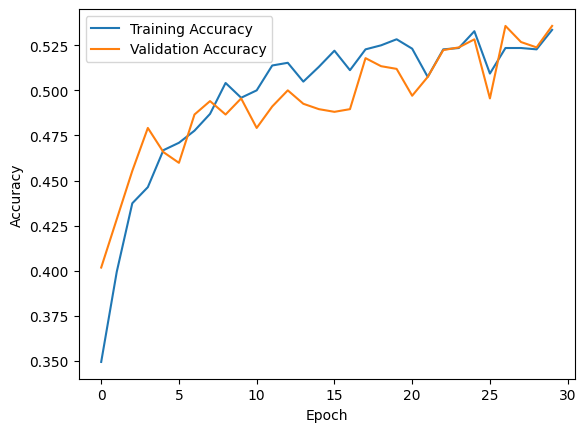

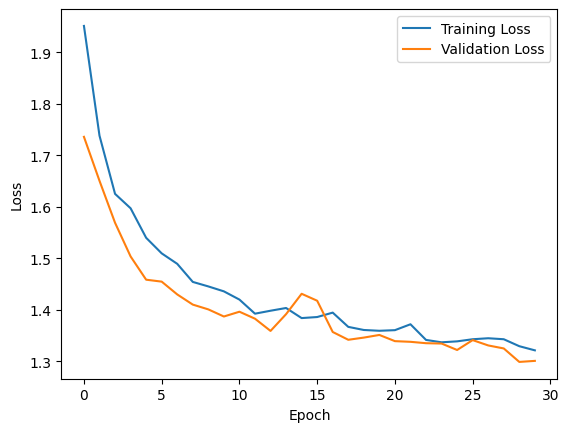

In [254]:
# Plotting the result
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

-----

# **Stack Bidirectional LSTM [Model 7]**

# Bidirectional LSTM layers with 64 and 32 memory cells

## Building the model

In [255]:
# Creating normalization layer

normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train) 

In [256]:
#Building the model (Bidirectional LSTM)

# Defining input layer
input_shape = X_train.shape[1:]
inputs = tf.keras.Input(shape=input_shape)

# Normalization layer receives the input
x = normalizer(inputs)

# Bidirectional LSTM layer
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, recurrent_dropout=0.3, return_sequences=True))(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, recurrent_dropout=0.3, return_sequences=False))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)

# Adding output layer
outputs = tf.keras.layers.Dense(11, activation='softmax')(x)

# Finally, define the model by specifying the input and output layers
bidirectional_lstm_model = keras.Model(inputs, outputs)

## Compiling the model

In [257]:
# Compile the model

bidirectional_lstm_model.compile(optimizer=Adam(learning_rate = 0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
bidirectional_lstm_model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 6, 36)]           0         
                                                                 
 normalization_10 (Normaliz  (None, 6, 36)             73        
 ation)                                                          
                                                                 
 bidirectional_9 (Bidirecti  (None, 6, 128)            51712     
 onal)                                                           
                                                                 
 batch_normalization_3 (Bat  (None, 6, 128)            512       
 chNormalization)                                                
                                                                 
 bidirectional_10 (Bidirect  (None, 64)                41216     
 ional)                                                   

## Training the model

In [258]:
# Train the model

history = bidirectional_lstm_model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
84/84 [==============================] - 21s 87ms/step - loss: 2.2073 - accuracy: 0.3290 - val_loss: 1.8835 - val_accuracy: 0.3601
Epoch 2/30
84/84 [==============================] - 3s 37ms/step - loss: 1.7584 - accuracy: 0.3897 - val_loss: 1.7871 - val_accuracy: 0.3958
Epoch 3/30
84/84 [==============================] - 3s 32ms/step - loss: 1.6715 - accuracy: 0.4195 - val_loss: 1.5925 - val_accuracy: 0.4449
Epoch 4/30
84/84 [==============================] - 3s 32ms/step - loss: 1.6123 - accuracy: 0.4523 - val_loss: 1.6958 - val_accuracy: 0.3795
Epoch 5/30
84/84 [==============================] - 3s 30ms/step - loss: 1.5609 - accuracy: 0.4598 - val_loss: 1.5063 - val_accuracy: 0.5074
Epoch 6/30
84/84 [==============================] - 3s 32ms/step - loss: 1.5179 - accuracy: 0.4836 - val_loss: 1.5485 - val_accuracy: 0.4747
Epoch 7/30
84/84 [==============================] - 3s 33ms/step - loss: 1.4877 - accuracy: 0.4855 - val_loss: 1.4973 - val_accuracy: 0.4807
Epoch 8/30
8

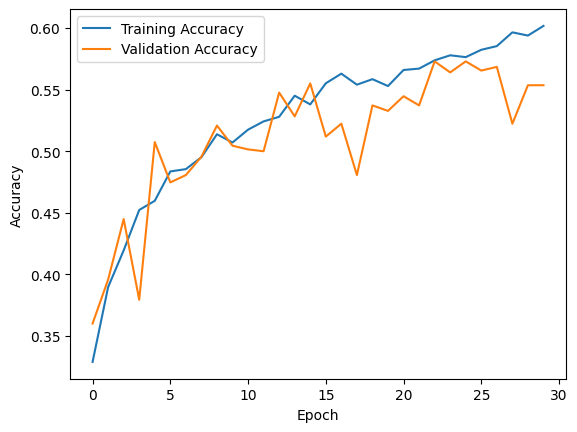

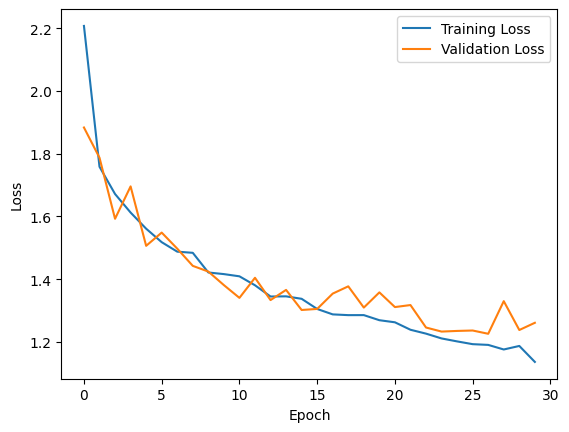

In [259]:
# Plotting the result
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

-----

# **Batch Normalization with various layers [Model 8]**

# LSTM with 16 memory cells; GRU layers with 8 and 32 memory cells; Simple RNN with 64 memory cells

## Building the model

In [260]:
# Adding normalization layer
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train)

In [261]:
import tensorflow as tf

# Defining input layer
input_shape = X_train.shape[1:]
inputs = tf.keras.Input(shape=input_shape)

x = normalizer(inputs)

# Adding LSTM layer with BatchNormalization
x = tf.keras.layers.LSTM(16, recurrent_dropout = 0.2, return_sequences=True)(x)
x = tf.keras.layers.GRU(8, recurrent_dropout = 0.2,return_sequences=True)(x)
x = tf.keras.layers.BatchNormalization()(x)

# Adding GRU layer with BatchNormalization
x = tf.keras.layers.GRU(32, recurrent_dropout = 0.2,return_sequences=True)(x)
x = tf.keras.layers.BatchNormalization()(x)

# Adding SimpleRNN layer with BatchNormalization
x = tf.keras.layers.SimpleRNN(64, recurrent_dropout = 0.2,return_sequences=False)(x)
x = tf.keras.layers.BatchNormalization()(x)

# Adding output layer
outputs = tf.keras.layers.Dense(11, activation='softmax')(x)

# Finally, define the model by specifying the input and output layers
recurrent_model = tf.keras.Model(inputs, outputs)

In [262]:
recurrent_model.compile(optimizer=Adam(learning_rate = 0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
recurrent_model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 6, 36)]           0         
                                                                 
 normalization_11 (Normaliz  (None, 6, 36)             73        
 ation)                                                          
                                                                 
 lstm_19 (LSTM)              (None, 6, 16)             3392      
                                                                 
 gru_7 (GRU)                 (None, 6, 8)              624       
                                                                 
 batch_normalization_5 (Bat  (None, 6, 8)              32        
 chNormalization)                                                
                                                                 
 gru_8 (GRU)                 (None, 6, 32)             403

## Training the model

In [263]:
# Train the model

history = recurrent_model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
84/84 [==============================] - 16s 43ms/step - loss: 2.0222 - accuracy: 0.3245 - val_loss: 2.0072 - val_accuracy: 0.3780
Epoch 2/30
84/84 [==============================] - 2s 27ms/step - loss: 1.7744 - accuracy: 0.3767 - val_loss: 1.8422 - val_accuracy: 0.3943
Epoch 3/30
84/84 [==============================] - 2s 27ms/step - loss: 1.7154 - accuracy: 0.3983 - val_loss: 1.9629 - val_accuracy: 0.2381
Epoch 4/30
84/84 [==============================] - 2s 28ms/step - loss: 1.6310 - accuracy: 0.4355 - val_loss: 1.6097 - val_accuracy: 0.4628
Epoch 5/30
84/84 [==============================] - 2s 27ms/step - loss: 1.6132 - accuracy: 0.4523 - val_loss: 1.6689 - val_accuracy: 0.4360
Epoch 6/30
84/84 [==============================] - 2s 29ms/step - loss: 1.5719 - accuracy: 0.4605 - val_loss: 1.5572 - val_accuracy: 0.4717
Epoch 7/30
84/84 [==============================] - 2s 26ms/step - loss: 1.5238 - accuracy: 0.4732 - val_loss: 1.5187 - val_accuracy: 0.4643
Epoch 8/30
8

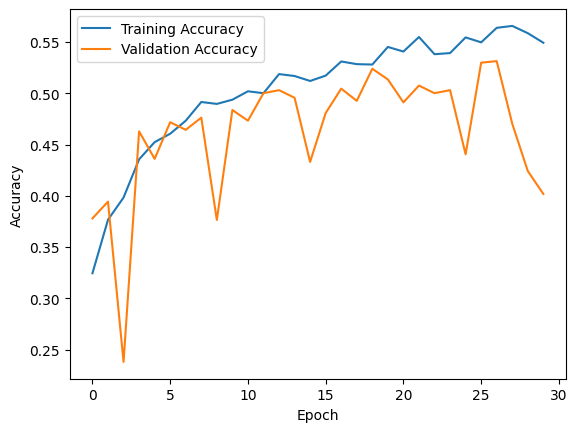

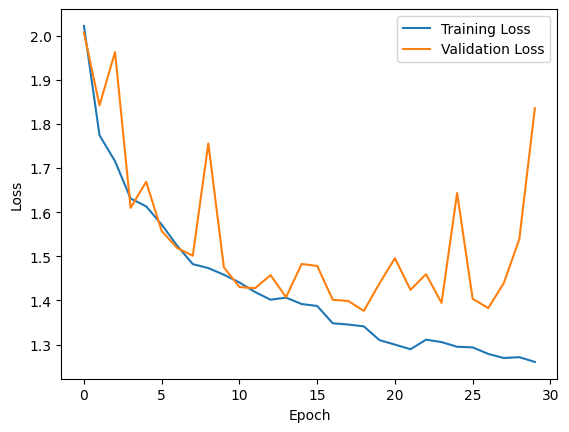

In [264]:
# Plotting the result
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

---------

# **Further / Advanced Development:** 

### 1. Downsampling the majority class
### 2. Min-Max Normalization

# 1. Downsampling the majority class to minority class (next majority class)  -- [Model 9]

## Loading training data 

In [265]:
#Reading training data as pandas dataframe
lsst_train = pd.read_csv('/kaggle/input/csc-578-final-project-fall-2023/lsst-train.csv')
lsst_train.head()

,f-1-1,f-1-2,f-1-3,f-1-4,f-1-5,f-1-6,f-1-7,f-1-8,f-1-9,f-1-10,...,f-6-28,f-6-29,f-6-30,f-6-31,f-6-32,f-6-33,f-6-34,f-6-35,f-6-36,target
0,2.57770,-1.18830,-4.98950,-6.4301,-4.6503,-1.02450,1.90420,2.48850,1.360500,0.90286,...,22.36600,-24.7480,-34.21500,7.7464,-5.8332,-0.71757,8.16160,-29.6940,-27.5700,c-90
1,6.67580,22.54300,44.02700,66.9610,86.0820,96.80400,96.76000,86.49400,69.094000,48.97100,...,19.26700,28.5110,0.97578,-28.0270,-18.0720,-4.00020,-43.07500,-4.7283,-43.0070,c-15
2,0.37554,-3.10860,-0.26009,3.2281,-1.9951,0.12797,0.25844,-0.25394,-0.091828,2.41440,...,-4.02610,14.5270,50.00500,-13.8860,3.3589,5.00450,-0.47256,-2.7713,1.9379,c-42
3,0.51852,0.12078,1.53240,5.5783,11.5340,17.01300,18.97100,15.38700,6.685500,-4.07800,...,23.24700,31.9850,26.62100,-12.2560,3.4805,23.80500,-32.36400,-15.1610,-14.4500,c-16
4,1.47150,1.44510,2.91330,1.0015,-1.2503,1.55160,1.73170,0.47796,0.539860,-1.71690,...,-0.18477,3.8533,-5.80000,1.4909,2.7581,-3.16650,-0.30058,6.6334,7.3427,c-67


## Converting target column to integers

In [266]:
# Converting target column to integers
from sklearn.preprocessing import LabelEncoder

target_column = ['c-15', 'c-16', 'c-42', 'c-52', 'c-62', 'c-65', 'c-67', 'c-88', 'c-90', 'c-92', 'c-95']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column
integer_encoded = label_encoder.fit_transform(lsst_train['target'])

# Print the mapping between original classes and encoded integers
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:", class_mapping)

lsst_train['target'] = integer_encoded

lsst_train.head()

Class Mapping: {'c-15': 0, 'c-16': 1, 'c-42': 2, 'c-52': 3, 'c-62': 4, 'c-65': 5, 'c-67': 6, 'c-88': 7, 'c-90': 8, 'c-92': 9, 'c-95': 10}


,f-1-1,f-1-2,f-1-3,f-1-4,f-1-5,f-1-6,f-1-7,f-1-8,f-1-9,f-1-10,...,f-6-28,f-6-29,f-6-30,f-6-31,f-6-32,f-6-33,f-6-34,f-6-35,f-6-36,target
0,2.57770,-1.18830,-4.98950,-6.4301,-4.6503,-1.02450,1.90420,2.48850,1.360500,0.90286,...,22.36600,-24.7480,-34.21500,7.7464,-5.8332,-0.71757,8.16160,-29.6940,-27.5700,8
1,6.67580,22.54300,44.02700,66.9610,86.0820,96.80400,96.76000,86.49400,69.094000,48.97100,...,19.26700,28.5110,0.97578,-28.0270,-18.0720,-4.00020,-43.07500,-4.7283,-43.0070,0
2,0.37554,-3.10860,-0.26009,3.2281,-1.9951,0.12797,0.25844,-0.25394,-0.091828,2.41440,...,-4.02610,14.5270,50.00500,-13.8860,3.3589,5.00450,-0.47256,-2.7713,1.9379,2
3,0.51852,0.12078,1.53240,5.5783,11.5340,17.01300,18.97100,15.38700,6.685500,-4.07800,...,23.24700,31.9850,26.62100,-12.2560,3.4805,23.80500,-32.36400,-15.1610,-14.4500,1
4,1.47150,1.44510,2.91330,1.0015,-1.2503,1.55160,1.73170,0.47796,0.539860,-1.71690,...,-0.18477,3.8533,-5.80000,1.4909,2.7581,-3.16650,-0.30058,6.6334,7.3427,6


## Exploratory Data Analysis

In [267]:
lsst_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3356 entries, 0 to 3355
Columns: 217 entries, f-1-1 to target
dtypes: float64(216), int64(1)
memory usage: 5.6 MB


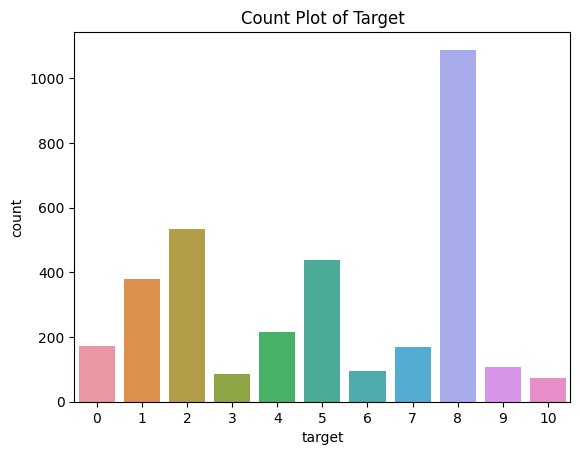

In [268]:
sns.countplot(x='target', data=lsst_train)
plt.title('Count Plot of Target')
plt.show()


In [269]:
lsst_train['target'].value_counts()

target
8     1088
2      534
5      438
1      378
4      214
0      173
7      169
9      108
6       95
3       87
10      72
Name: count, dtype: int64

## Downsampling the majority class

In [270]:
import pandas as pd
from sklearn.utils import resample

# Assuming lsst_train is your DataFrame

# Separate majority and minority classes
majority_class = 8
minority_classes = [2, 5, 1, 4, 0, 7, 9, 6, 3, 10]

majority_data = lsst_train[lsst_train['target'] == majority_class]

# Downsample the majority class
n_samples = 534  # Set to the desired size of the downsampled majority class
downsampled_majority_data = resample(majority_data, 
                                     replace=False,
                                     n_samples=n_samples,
                                     random_state=42)

# Combine the downsampled majority class with minority classes
downsampled_lsst_train = pd.concat([downsampled_majority_data, lsst_train[lsst_train['target'].isin(minority_classes)]])

# Shuffle the dataframe to mix the classes
downsampled_lsst_train = downsampled_lsst_train.sample(frac=1, random_state=42)

# Display the class distribution
print(downsampled_lsst_train['target'].value_counts())

target
2     534
8     534
5     438
1     378
4     214
0     173
7     169
9     108
6      95
3      87
10     72
Name: count, dtype: int64


In [271]:
downsampled_lsst_train.head()

,f-1-1,f-1-2,f-1-3,f-1-4,f-1-5,f-1-6,f-1-7,f-1-8,f-1-9,f-1-10,...,f-6-28,f-6-29,f-6-30,f-6-31,f-6-32,f-6-33,f-6-34,f-6-35,f-6-36,target
828,0.65941,2.0162,-3.25500,-0.32518,0.82348,0.007939,-0.35876,-1.9087,-0.93314,-0.28848,...,-2.9748,-6.8301,0.31605,-5.26410,3.3631,6.0282,1.9827,-4.3127,-4.3335,4
1002,1.56880,1.5988,-0.68794,-5.04280,-8.88610,-8.517500,-1.80650,9.6301,20.70500,25.78400,...,-46.4130,-28.6600,-55.98700,10.50000,-2.9128,-24.2660,-4.6439,-5.1057,-30.7880,1
124,-21.64700,-20.3810,-10.76300,4.91150,21.79000,34.853000,41.26500,41.2910,37.32000,31.79200,...,17.9910,-6.3884,-40.68900,-0.31996,-22.5600,-20.2690,-13.2520,7.2656,17.4300,2
1247,-2.14250,1.6485,1.31460,-0.67851,2.01760,0.325180,-1.59000,2.4876,-3.01880,-0.52102,...,15.7590,4.2065,7.75700,10.70900,7.9574,9.0508,4.1147,9.7484,13.8240,7
705,30.51900,45.6670,42.47800,35.13400,45.63900,44.534000,48.33600,45.3090,67.24100,58.02500,...,9.9809,-6.9083,-15.69000,-2.62100,-1.2611,-1.2118,-2.1736,10.0770,17.3840,7


## Visualizing downsampled target

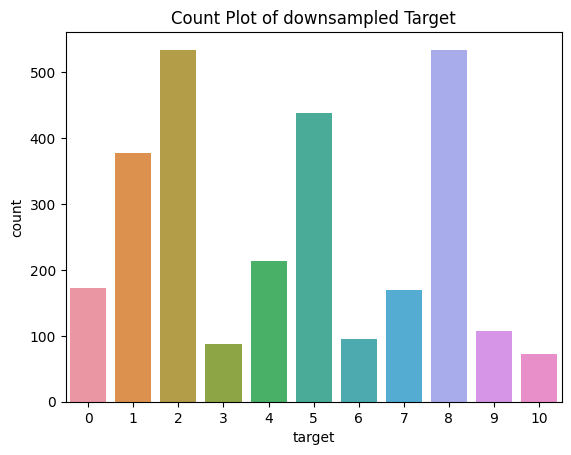

In [272]:
sns.countplot(x='target', data=downsampled_lsst_train)
plt.title('Count Plot of downsampled Target')
plt.show()

## Reshaping training data

In [273]:
# Reshaping X_train to (-1, timesteps, features)
timesteps = 6
features = 36

X_train = downsampled_lsst_train.iloc[:, :-1]
X_train = X_train.to_numpy()
X_train_reshaped = X_train.reshape(-1, timesteps, features)

# Display the shape of the original and reshaped arrays
print("Original shape:", X_train.shape)
print("Reshaped shape:", X_train_reshaped.shape)

X_train = X_train_reshaped

Original shape: (2802, 216)
Reshaped shape: (2802, 6, 36)


In [274]:
# Reshaping Y_train to (-1,1)

Y_train = lsst_train['target']
Y_train = Y_train.to_numpy()
Y_train_reshaped = Y_train.reshape(-1, 1)

# Display the shape of the original and reshaped arrays
print("Original shape:", Y_train.shape)
print("Reshaped shape:", Y_train_reshaped.shape)

Y_train = Y_train_reshaped

Original shape: (3356,)
Reshaped shape: (3356, 1)


## Adding normalization layer

In [275]:
# Creating normalization layer

normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train) 

## Building the model: Bidirectional LSTM layer 

In [276]:
#Building the model (Bidirectional LSTM)

# Defining input layer
input_shape = X_train.shape[1:]
inputs = tf.keras.Input(shape=input_shape)

# Normalization layer receives the input
x = normalizer(inputs)

# Bidirectional LSTM layer
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, recurrent_dropout=0.3, return_sequences=False))(x)
x = tf.keras.layers.Dropout(0.5)(x)

# Adding output layer
outputs = tf.keras.layers.Dense(11, activation='softmax')(x)

# Finally, define the model by specifying the input and output layers
bidirectional_lstm_model = keras.Model(inputs, outputs)

## Compiling the model

In [277]:
# Compile the model

bidirectional_lstm_model.compile(optimizer=Adam(learning_rate = 0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
bidirectional_lstm_model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 6, 36)]           0         
                                                                 
 normalization_12 (Normaliz  (None, 6, 36)             73        
 ation)                                                          
                                                                 
 bidirectional_11 (Bidirect  (None, 64)                17664     
 ional)                                                          
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 11)                715       
                                                                 
Total params: 18452 (72.08 KB)
Trainable params: 18379 (71

## Training the model

In [278]:
# Train the model

history = bidirectional_lstm_model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
71/71 [==============================] - 8s 26ms/step - loss: 2.1042 - accuracy: 0.3034 - val_loss: 2.0690 - val_accuracy: 0.3405
Epoch 2/30
71/71 [==============================] - 1s 15ms/step - loss: 2.0432 - accuracy: 0.3244 - val_loss: 2.0668 - val_accuracy: 0.3422
Epoch 3/30
71/71 [==============================] - 1s 16ms/step - loss: 2.0217 - accuracy: 0.3222 - val_loss: 2.0707 - val_accuracy: 0.3405
Epoch 4/30
71/71 [==============================] - 1s 17ms/step - loss: 2.0172 - accuracy: 0.3271 - val_loss: 2.0644 - val_accuracy: 0.3405
Epoch 5/30
71/71 [==============================] - 1s 16ms/step - loss: 1.9907 - accuracy: 0.3360 - val_loss: 2.0732 - val_accuracy: 0.3369
Epoch 6/30
71/71 [==============================] - 1s 16ms/step - loss: 1.9827 - accuracy: 0.3423 - val_loss: 2.0673 - val_accuracy: 0.3422
Epoch 7/30
71/71 [==============================] - 1s 16ms/step - loss: 1.9709 - accuracy: 0.3445 - val_loss: 2.0865 - val_accuracy: 0.3405
Epoch 8/30
71

## Plotting the result

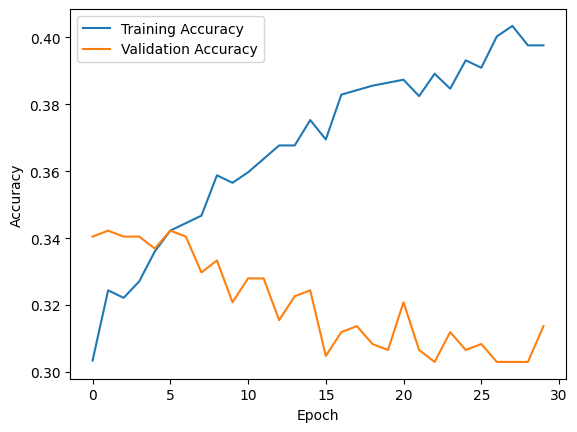

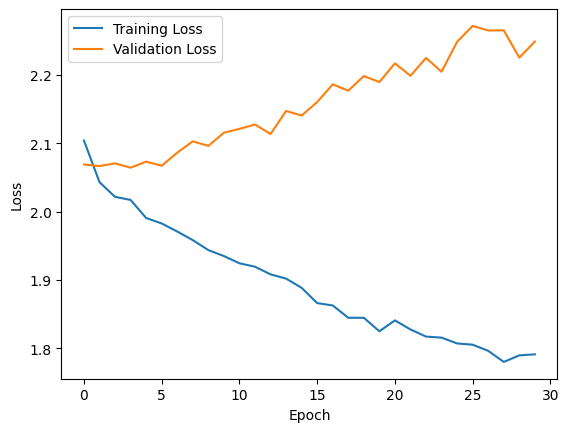

In [279]:
# Plotting the result
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

--------------

# 2. Performing Min-Max Normalization as a normalization technique -- [Model 10]

## Preparing training data

In [280]:
#Reading training data as pandas dataframe
lsst_train = pd.read_csv('/kaggle/input/csc-578-final-project-fall-2023/lsst-train.csv')
lsst_train.head()

,f-1-1,f-1-2,f-1-3,f-1-4,f-1-5,f-1-6,f-1-7,f-1-8,f-1-9,f-1-10,...,f-6-28,f-6-29,f-6-30,f-6-31,f-6-32,f-6-33,f-6-34,f-6-35,f-6-36,target
0,2.57770,-1.18830,-4.98950,-6.4301,-4.6503,-1.02450,1.90420,2.48850,1.360500,0.90286,...,22.36600,-24.7480,-34.21500,7.7464,-5.8332,-0.71757,8.16160,-29.6940,-27.5700,c-90
1,6.67580,22.54300,44.02700,66.9610,86.0820,96.80400,96.76000,86.49400,69.094000,48.97100,...,19.26700,28.5110,0.97578,-28.0270,-18.0720,-4.00020,-43.07500,-4.7283,-43.0070,c-15
2,0.37554,-3.10860,-0.26009,3.2281,-1.9951,0.12797,0.25844,-0.25394,-0.091828,2.41440,...,-4.02610,14.5270,50.00500,-13.8860,3.3589,5.00450,-0.47256,-2.7713,1.9379,c-42
3,0.51852,0.12078,1.53240,5.5783,11.5340,17.01300,18.97100,15.38700,6.685500,-4.07800,...,23.24700,31.9850,26.62100,-12.2560,3.4805,23.80500,-32.36400,-15.1610,-14.4500,c-16
4,1.47150,1.44510,2.91330,1.0015,-1.2503,1.55160,1.73170,0.47796,0.539860,-1.71690,...,-0.18477,3.8533,-5.80000,1.4909,2.7581,-3.16650,-0.30058,6.6334,7.3427,c-67


In [281]:
# Converting target column to integers
from sklearn.preprocessing import LabelEncoder

target_column = ['c-15', 'c-16', 'c-42', 'c-52', 'c-62', 'c-65', 'c-67', 'c-88', 'c-90', 'c-92', 'c-95']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column
integer_encoded = label_encoder.fit_transform(lsst_train['target'])

# Print the mapping between original classes and encoded integers
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:", class_mapping)

lsst_train['target'] = integer_encoded

lsst_train.head()

Class Mapping: {'c-15': 0, 'c-16': 1, 'c-42': 2, 'c-52': 3, 'c-62': 4, 'c-65': 5, 'c-67': 6, 'c-88': 7, 'c-90': 8, 'c-92': 9, 'c-95': 10}


,f-1-1,f-1-2,f-1-3,f-1-4,f-1-5,f-1-6,f-1-7,f-1-8,f-1-9,f-1-10,...,f-6-28,f-6-29,f-6-30,f-6-31,f-6-32,f-6-33,f-6-34,f-6-35,f-6-36,target
0,2.57770,-1.18830,-4.98950,-6.4301,-4.6503,-1.02450,1.90420,2.48850,1.360500,0.90286,...,22.36600,-24.7480,-34.21500,7.7464,-5.8332,-0.71757,8.16160,-29.6940,-27.5700,8
1,6.67580,22.54300,44.02700,66.9610,86.0820,96.80400,96.76000,86.49400,69.094000,48.97100,...,19.26700,28.5110,0.97578,-28.0270,-18.0720,-4.00020,-43.07500,-4.7283,-43.0070,0
2,0.37554,-3.10860,-0.26009,3.2281,-1.9951,0.12797,0.25844,-0.25394,-0.091828,2.41440,...,-4.02610,14.5270,50.00500,-13.8860,3.3589,5.00450,-0.47256,-2.7713,1.9379,2
3,0.51852,0.12078,1.53240,5.5783,11.5340,17.01300,18.97100,15.38700,6.685500,-4.07800,...,23.24700,31.9850,26.62100,-12.2560,3.4805,23.80500,-32.36400,-15.1610,-14.4500,1
4,1.47150,1.44510,2.91330,1.0015,-1.2503,1.55160,1.73170,0.47796,0.539860,-1.71690,...,-0.18477,3.8533,-5.80000,1.4909,2.7581,-3.16650,-0.30058,6.6334,7.3427,6


In [282]:
# Perform min-max normalization on training data
scaler = MinMaxScaler()

X_train = lsst_train.iloc[:, :-1]
X_train = scaler.fit_transform(X_train)

In [283]:
# Reshaping X_train to (-1, timesteps, features)
timesteps = 6
features = 36

X_train_reshaped = X_train.reshape(-1, timesteps, features)

# Display the shape of the original and reshaped arrays
print("Original shape:", X_train.shape)
print("Reshaped shape:", X_train_reshaped.shape)

X_train = X_train_reshaped

Original shape: (3356, 216)
Reshaped shape: (3356, 6, 36)


In [284]:
# Reshaping Y_train to (-1,1)

Y_train = lsst_train['target']
Y_train = Y_train.to_numpy()
Y_train_reshaped = Y_train.reshape(-1, 1)


# Display the shape of the original and reshaped arrays
print("Original shape:", Y_train.shape)
print("Reshaped shape:", Y_train_reshaped.shape)

Y_train = Y_train_reshaped

Original shape: (3356,)
Reshaped shape: (3356, 1)


## Building the model

In [285]:
import tensorflow as tf

# Defining input layer
input_shape = X_train.shape[1:]
inputs = tf.keras.Input(shape=input_shape)

# Adding Bidirectional LSTM layer
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, recurrent_dropout=0.3, return_sequences=False))(inputs)
x = tf.keras.layers.Dropout(0.5)(x)

# Adding output layer
outputs = tf.keras.layers.Dense(11, activation='softmax')(x)

# Finally, define the model by specifying the input and output layers
minmax_model = tf.keras.Model(inputs, outputs)


## Compiling the model

In [286]:
minmax_model.compile(optimizer=Adam(learning_rate = 0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
minmax_model.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 6, 36)]           0         
                                                                 
 bidirectional_12 (Bidirect  (None, 64)                17664     
 ional)                                                          
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 11)                715       
                                                                 
Total params: 18379 (71.79 KB)
Trainable params: 18379 (71.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training the model

In [287]:
# Train the model

history = minmax_model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
84/84 [==============================] - 8s 22ms/step - loss: 2.1085 - accuracy: 0.3059 - val_loss: 2.0434 - val_accuracy: 0.3289
Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: 2.0684 - accuracy: 0.3230 - val_loss: 2.0486 - val_accuracy: 0.3289
Epoch 3/10
84/84 [==============================] - 1s 14ms/step - loss: 2.0575 - accuracy: 0.3230 - val_loss: 2.0334 - val_accuracy: 0.3289
Epoch 4/10
84/84 [==============================] - 2s 18ms/step - loss: 2.0538 - accuracy: 0.3230 - val_loss: 2.0327 - val_accuracy: 0.3289
Epoch 5/10
84/84 [==============================] - 1s 15ms/step - loss: 2.0527 - accuracy: 0.3230 - val_loss: 2.0324 - val_accuracy: 0.3289
Epoch 6/10
84/84 [==============================] - 1s 17ms/step - loss: 2.0477 - accuracy: 0.3230 - val_loss: 2.0341 - val_accuracy: 0.3289
Epoch 7/10
84/84 [==============================] - 1s 16ms/step - loss: 2.0459 - accuracy: 0.3230 - val_loss: 2.0307 - val_accuracy: 0.3289
Epoch 8/10
84

## Plotting the result

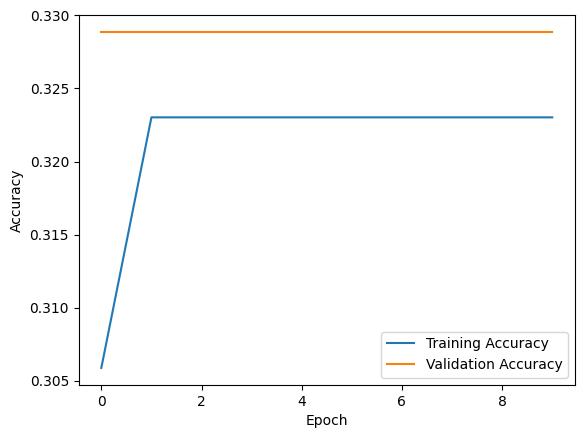

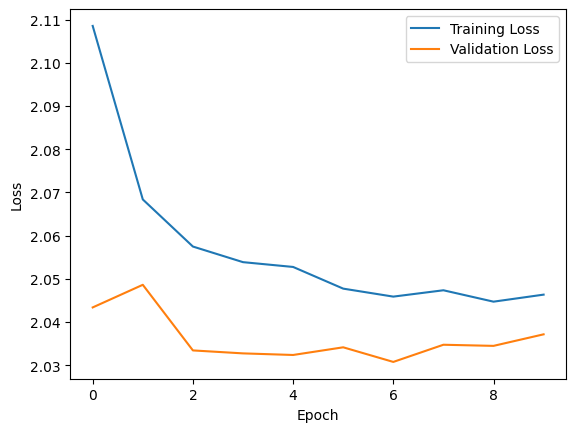

In [288]:
# Plotting the result
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


-------